# Quantum State Orbitals

The [wavefunction for Hydrogren-like atoms](https://en.wikipedia.org/wiki/Hydrogen-like_atom#Non-relativistic_wavefunction_and_energy) is,

$$\begin{align}
\psi _{{nlm}}&=R_{{nl}}(r)\,Y_{{lm}}(\theta ,\phi ) \\
R_{nl}(r)&={\sqrt {{\left({\frac {2Z}{na_{\mu }}}\right)}^{3}{\frac {(n-l-1)!}{2n[(n+l)!]}}}}e^{-Zr/{na_{\mu }}}\left({\frac {2Zr}{na_{\mu }}}\right)^{l}L_{n-l-1}^{2l+1}\left({\frac {2Zr}{na_{\mu }}}\right) \\
a_{{\mu }} &={{4\pi \varepsilon _{0}\hbar ^{2}} \over {\mu e^{2}}}={\frac  {\hbar c}{\alpha \mu c^{2}}}={{m_{{{\mathrm  {e}}}}} \over {\mu }}a_{0}
\end{align}$$

In [1]:
import numpy as np
from scipy.special import sph_harm, genlaguerre
from scipy.misc import factorial

si_constants = {
    "m_electron": 9.10938356e-31, # kg
    "m_atomic": 1.6726219e-27, # kg
    "bohr_radius": 5.2917721067e-11, # m
}

natural_constants = {
    "m_electron": si_constants['m_electron'] / si_constants['m_atomic'],
    "m_atomic": 1.0,
    "bohr_radius": 1.0,
}

def orbital(x, y, z, n, l, m, Z, N, constants=natural_constants, exact=False):
    """
    Arguments:
        X, Y, Z - coordinate points
        ... all the quantum numbers ...
        N - number of atomic masses in nucleus
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arccos(z/r)
    theta = np.arctan2(y, x)
    
    mu = (constants['m_electron'] * N * constants['m_atomic'])/(constants['m_electron'] + N * constants['m_atomic'])
    a_mu = constants['m_electron'] * constants['bohr_radius'] / mu
    
    Y = sph_harm(m, l, theta, phi)
    L = genlaguerre(n - l - 1, 2*l + 1)
    Zr = Z * r / (n*a_mu)
    
    R = np.sqrt(
            (2.0 * Z / (n * a_mu))**3 *
            factorial(n - l - 1) / (2*n * factorial(n+l))
        ) * np.exp(-Zr) * (2.0 * Zr)**l * L(2.0*Zr)
    return Y * R 

In [7]:
dx = 0.1
lim = [-20, 20]

X, Y, Z = np.meshgrid(
    np.arange(lim[0], lim[1], dx).reshape(-1, 1, 1),
    np.arange(lim[0], lim[1], dx).reshape(1, -1, 1),
    np.arange(lim[0], lim[1], dx).reshape(1, 1, -1)
)
X.shape, Y.shape, X.shape

((400, 400, 400), (400, 400, 400), (400, 400, 400))

1s_0z


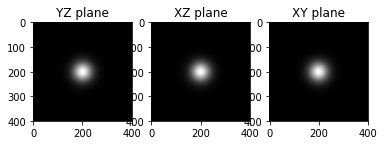

2s_0z


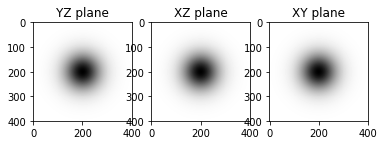

2p_0z


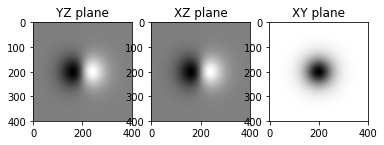

2p_1x


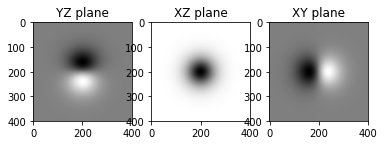

2p_1y


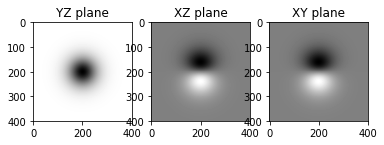

3s_0z


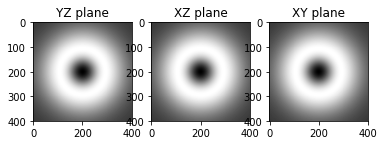

3p_0z


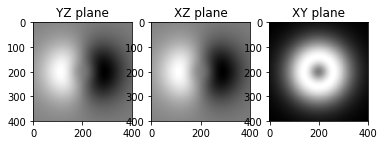

3p_1x


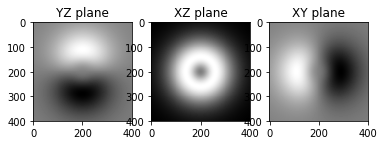

3p_1y


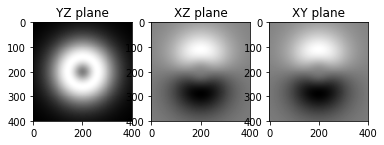

3d_0z


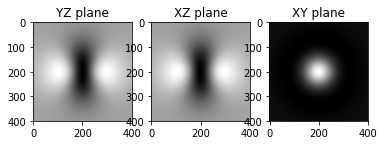

3d_1x


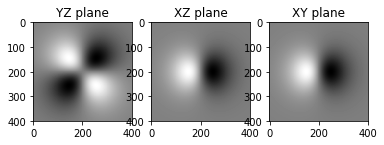

3d_1y


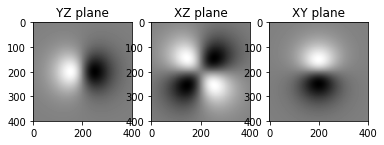

3d_2x


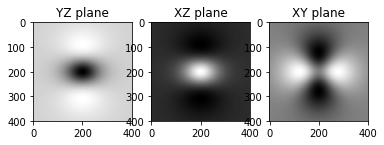

3d_2y


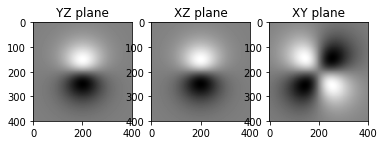

In [8]:
import matplotlib.pyplot as plt

letter = ['s', 'p', 'd', 'f', 'g']

for n in [1, 2, 3]:
    for l in range(n):
        orbitals = {
            '0z':np.real(orbital(X, Y, Z, n, l, 0, Z=1, N=1))
        }
        for m in range(1, l+1):
            wfn = orbital(X, Y, Z, n, l, m, Z=1, N=1)
            orbitals[f'{m}x'] = np.sqrt(2.0) * (-1)**m * np.real(wfn)
            orbitals[f'{m}y'] = np.sqrt(2.0) * (-1)**m * np.imag(wfn)
        
        for axis in orbitals:
            P = np.real(orbitals[axis])
            print(f'{n}{letter[l]}_{axis}')
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
            ax1.set_title('YZ plane')
            ax1.imshow(P[int(X.shape[0]/3), :, :], cmap='gray')
            
            ax2.set_title('XZ plane')
            ax2.imshow(P[:, int(X.shape[1]/3), :], cmap='gray')
            
            ax3.set_title('XY plane')
            ax3.imshow(P[:, :, int(X.shape[2]/3)], cmap='gray')
            plt.show()